<font color='green' size='7'>**Домашняя работа**</font>  
<font color='#11a642' size='6'>**Тема: Машинное обучение. Ансамбли моделей**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных конкурса https://www.kaggle.com/competitions/playground-series-s5e5  

**Что нужно сделать:**

1. Загрузить данные c конкурса  https://www.kaggle.com/competitions/playground-series-s5e5
2. Построить ансамбли моделей


**Форма загрузки на платформу:** строго файл ipynb. Перед загрузкой еще раз запустите ноутбук, убедившись, что все работает корректно без ошибок






# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

# <font color='#11a642' size='6'> **Загрузка данных**

In [2]:
!gdown 1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C

Downloading...
From: https://drive.google.com/uc?id=1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C
To: c:\Users\Maks\Documents\Курс\23. Градиентный бустинг (XGB, LightGBM, Catboost)\train_сalories.csv

  0%|          | 0.00/35.5M [00:00<?, ?B/s]
  1%|▏         | 524k/35.5M [00:00<00:12, 2.81MB/s]
  3%|▎         | 1.05M/35.5M [00:00<00:09, 3.52MB/s]
  6%|▌         | 2.10M/35.5M [00:00<00:06, 4.89MB/s]
  9%|▉         | 3.15M/35.5M [00:00<00:05, 5.76MB/s]
 12%|█▏        | 4.19M/35.5M [00:00<00:05, 6.12MB/s]
 15%|█▍        | 5.24M/35.5M [00:00<00:04, 6.45MB/s]
 18%|█▊        | 6.29M/35.5M [00:01<00:04, 6.03MB/s]
 21%|██        | 7.34M/35.5M [00:01<00:04, 6.13MB/s]
 24%|██▎       | 8.39M/35.5M [00:01<00:04, 6.36MB/s]
 27%|██▋       | 9.44M/35.5M [00:01<00:04, 6.48MB/s]
 30%|██▉       | 10.5M/35.5M [00:01<00:03, 6.70MB/s]
 33%|███▎      | 11.5M/35.5M [00:01<00:03, 6.64MB/s]
 35%|███▌      | 12.6M/35.5M [00:02<00:03, 6.24MB/s]
 38%|███▊      | 13.6M/35.5M [00:02<00:03, 6.46MB/s]
 41%|████▏     | 14.7M/35.

In [3]:
try:
  df = pd.read_csv('/content/train_сalories.csv')
except:
  df = pd.read_csv('train_сalories.csv')

In [4]:
# на этих данных дальше необходимо разработать модель
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


## <font color='#11a642' size='5'> Роли для переменных

In [5]:
target = 'Calories'

# <font color='#11a642' size='6'> **Разведочный анализ данных**

<font color='#11a642' size='5'>
Оцените размер вашего датасета  

1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [6]:
# Сколько ГБ ваш датасет

memory_b = df.memory_usage(deep=True).sum()
memory_mb = memory_b / 1024 ** 2
memory_gb = memory_mb / 1024
print('Объем памяти, который занимает дадасет:')
print('Объем памяти в байтах: {:03.3f} B'.format(memory_b))
print('Объем памяти в мегабайтах: {:03.3f} MB'.format(memory_mb))
print('Объем памяти в гигабайтах: {:03.3f} GB'.format(memory_gb))

Объем памяти, который занимает дадасет:
Объем памяти в байтах: 88501574.000 B
Объем памяти в мегабайтах: 84.402 MB
Объем памяти в гигабайтах: 0.082 GB


In [7]:
# Сколько строк и столбцов
num_rows = df.shape[0]
num_columns = df.shape[1]
print('Количество строк:', num_rows)
print('Количество столбцов:', num_columns)

Количество строк: 750000
Количество столбцов: 9


<font color='#11a642' size='5'>
Рекомендуется:

- посмотреть на `df.info()`, `df.describe()`
- визуализировать распределения целевой переменной и признаков (гистограммы, boxplot)
- посмотреть на корреляции (`df.corr()`)
- проверить пропуски

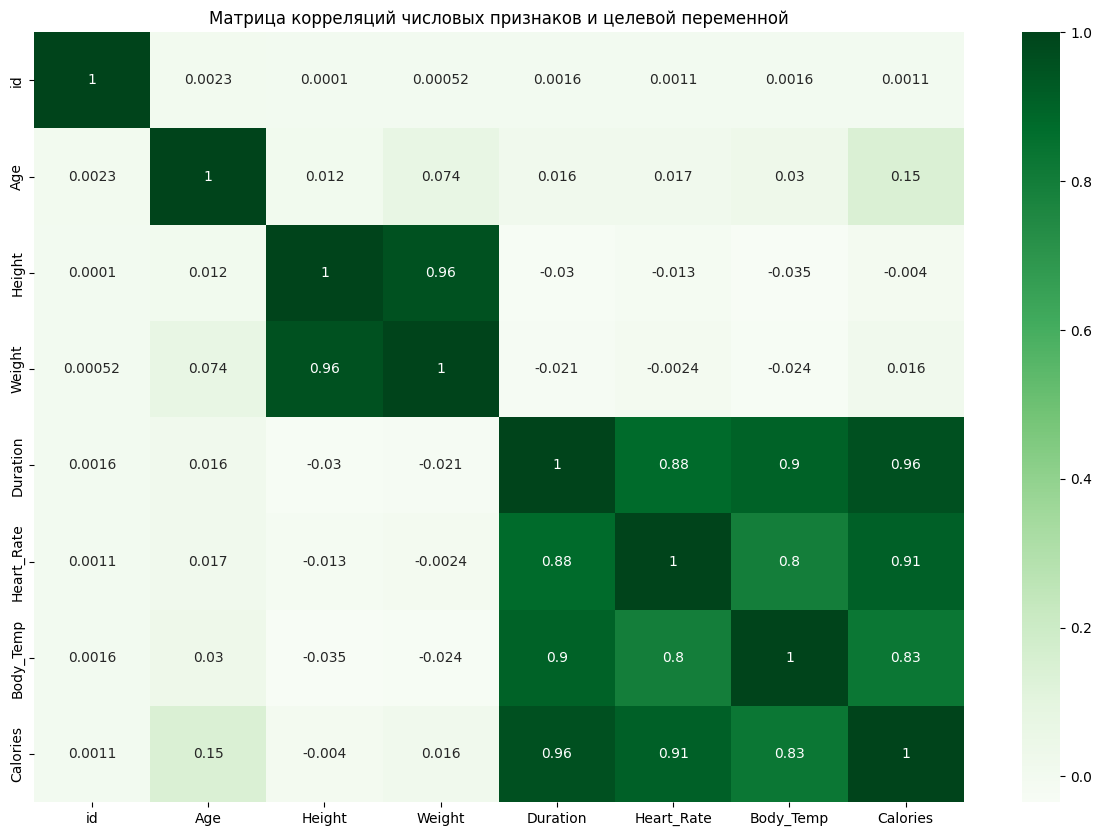

In [8]:
# Посторим тепловую карту линейной корреляции числовых признаков и целевой переменной
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop(['Sex'], axis=1).corr(), annot=True, cmap="Greens")
plt.title('Матрица корреляций числовых признаков и целевой переменной')
plt.show()

Как видно из графика, id практически не оказывает никакого влияния на целевую переменную, поэтому исключим этот признак

In [9]:
# Разделим признаки и целевую переменную
X = df.drop(['id', 'Calories'], axis=1)
y = df[target]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 40.1+ MB


In [11]:
# Определяем категориальные и числовые признаки
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns
print('Категориальные признаки:', list(categorical_features))
print('Числовые признаки:', list(numerical_features))

Категориальные признаки: ['Sex']
Числовые признаки: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']


In [12]:
X[numerical_features].describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [13]:
# Анализ и обработка пропусков

df.isna().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Как видим, пропуски в нашем датасете отсутствуют

In [14]:
# Мода, количество уникальных значений для категориальных признаков

df_mode = X[categorical_features].mode()
df_unique = X[categorical_features].nunique()
print("Мода:")
print(df_mode)
print("-" * 50)
print('Количество уникальных значений')
print(df_unique)

Мода:
      Sex
0  female
--------------------------------------------------
Количество уникальных значений
Sex    2
dtype: int64


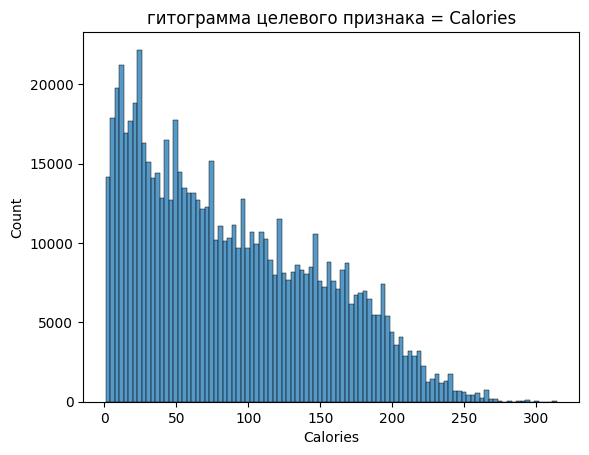

In [15]:
# Анализ целевого признака

sns.histplot(y, bins=100)
plt.title(f'гитограмма целевого признака = {target}')
plt.show()

Как видим, выбросы в целевой переменной отсутствуют

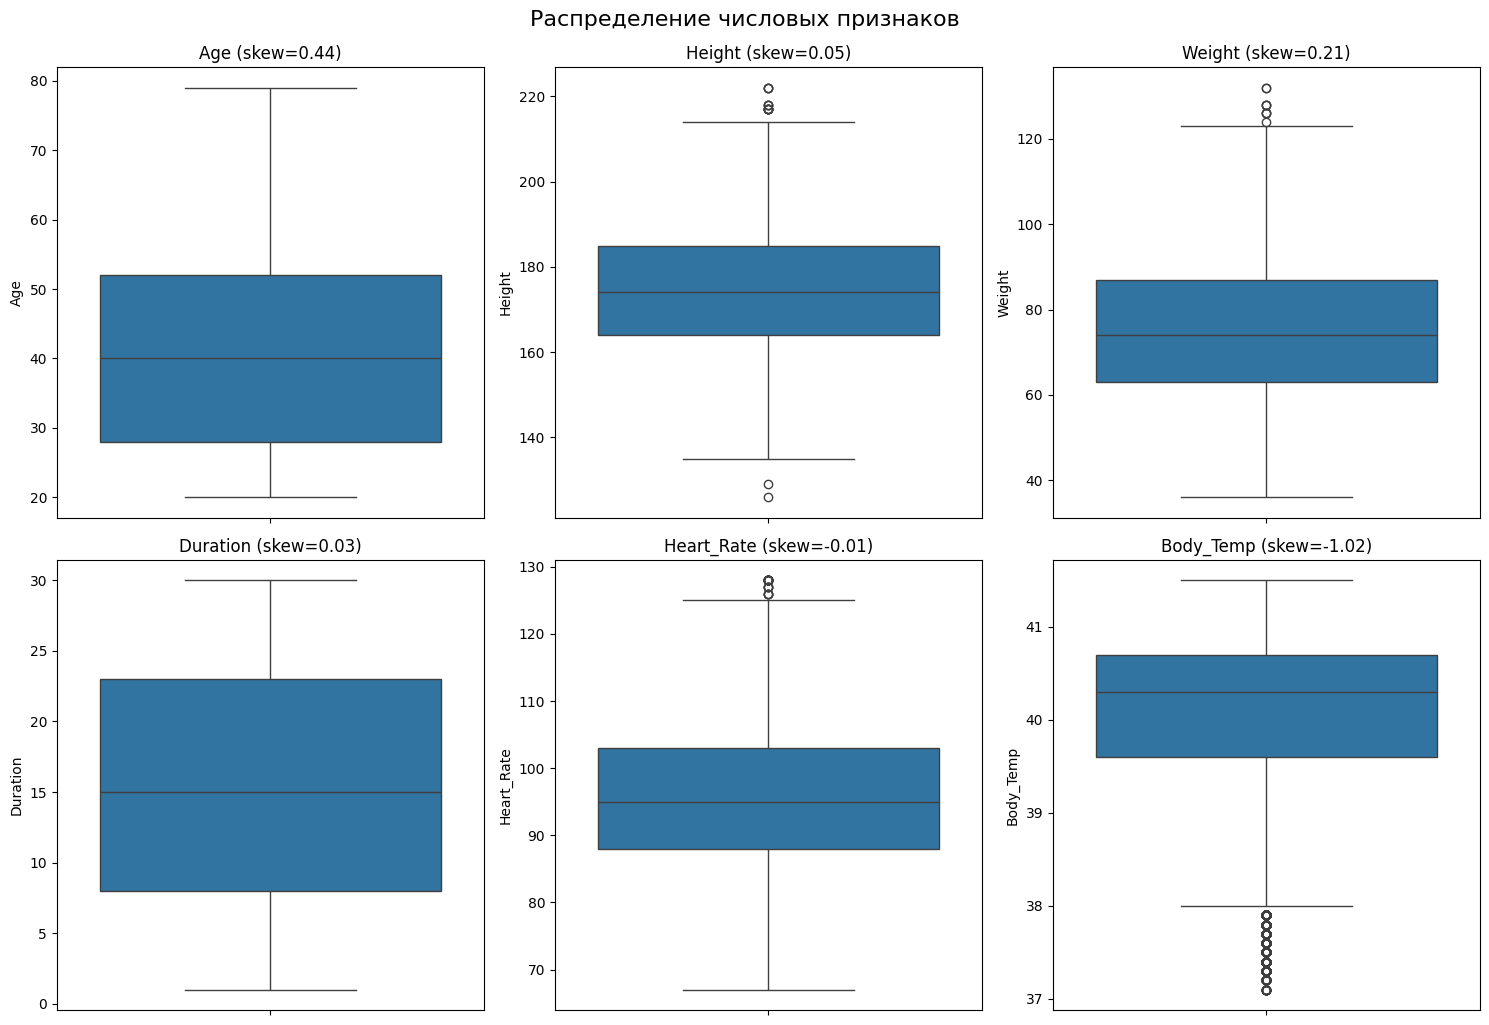

In [16]:
# Посмотрим на распределения числовых признаков
plt.figure(figsize=(15, 10))
n_cols = len(numerical_features) // 3
n_rows = 3 if len(numerical_features) % 3 == 0 else 4
for i, col in enumerate(numerical_features):
    plt.subplot(n_cols, n_rows, i + 1)
    sns.boxplot(df[col])
    plt.title(f'{col} (skew={df[col].skew():.2f})')
plt.tight_layout()
plt.suptitle("Распределение числовых признаков", fontsize=16, y=1.02)
plt.show()

На графиках мы видим, что выбросы есть в признаках Height (рост), Weight (вес), Heart_rate (пульс) и Body_temp (температура тела), но они не сильно критичны и укладываются в нормы организма человека. Но все же попробуем удалить выбросы, используя метод IQR 

In [17]:
# Удаление выбросов по IQR
Q1 = X[numerical_features].quantile(0.25)
Q3 = X[numerical_features].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
mask_iqr = (X[numerical_features] >= Q1 - 1.5 * IQR) & (X[numerical_features] <= Q3 + 1.5 * IQR)
train_iqr = X[mask_iqr].copy()
print(f"\nУдалено выбросов по IQR: {len(X) - len(train_iqr)}")


Удалено выбросов по IQR: 0


Как видим, выбросы настолько незначительные, что их не удалось удалить используя метод IQR

# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

In [18]:
# Разделим данные на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# <font color='#11a642' size='6'> **Построение моделей**

## <font color='#11a642' size='5'> Построение модели **Random Forest**. Гиперпараметры подберите либо вручную, либо с помощью GridSearchCV или RandomizedSearchCV


- необходимо ли обрабатывать категориальные признаки заранее?
- необходимо ли обрабатывать пропуски?

Ответ

1. Т.к. мы используем несколько разных моделей, и некоторые из этих моделей неспособны обрабатывать категориальные признаки, то мы их обработаем заранее. 

2. Пропуски в нашем датасете отсутствуют

In [19]:
# Анализ и обработка категориальных переменных
# Т.к. количество уникальных признаков для категориальных значений не большое, то будем использовать 
# OneHot-кодирование категориальных признаков
ohe = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])
ohe_feature_names = ohe.get_feature_names_out(categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe_feature_names, index=X_test.index)

# Удаляем старые категориальные, добавляем закодированные
X_train = X_train.drop(columns=['Sex']).join(X_train_encoded_df)
X_test = X_test.drop(columns=['Sex']).join(X_test_encoded_df)

In [20]:
# Масштабирование числовых признаков

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [21]:
# Построение Random Forest. Подберем гиперпараметры с помощью GridSearchCV

param_grid = {
    'n_estimators': np.arange(10, 150,60)
}

rf_best_regressor = RandomForestRegressor(random_state=42, max_samples=0.3)
grid_search = GridSearchCV(rf_best_regressor, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_samples=0.3, random_state=42),
             n_jobs=-1, param_grid={'n_estimators': array([ 10,  70, 130])},
             scoring='neg_mean_absolute_error')

In [22]:
# Выведем наилучшие параметры
best_params = grid_search.best_params_
best_params

{'n_estimators': np.int64(130)}

In [23]:
# Построение модели
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor

RandomForestRegressor(max_samples=0.3, n_estimators=np.int64(130),
                      random_state=42)

In [24]:
# Предсказания на тестовом и тренировочном наборе
y_pred_best_rf_test = best_rf_regressor.predict(X_test)
y_pred_best_rf_train = best_rf_regressor.predict(X_train)

In [25]:
# Вычисление метрик
mse_train = mean_squared_error(y_train, y_pred_best_rf_train)
mse_test = mean_squared_error(y_test, y_pred_best_rf_test)
mae_train = mean_absolute_error(y_train, y_pred_best_rf_train)
mae_test = mean_absolute_error(y_test, y_pred_best_rf_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_best_rf_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_best_rf_test)

# Вывод результатов
print(f'Mean Squared Error на трейне: {mse_train:.3f}')
print(f'Mean Squared Error на тесте: {mse_test:.3f}')
print(f'Mean Absolute Error на трейне: {mae_train:.3f}')
print(f'Mean Absolute Error на тесте: {mae_test:.3f}')
print(f'Mean Absolute Percantage Error на трейне: {mape_train:.3f}')
print(f'Mean Absolute Percantage Error на тесте: {mape_test:.3f}')

Mean Squared Error на трейне: 7.511
Mean Squared Error на тесте: 13.664
Mean Absolute Error на трейне: 1.632
Mean Absolute Error на тесте: 2.200
Mean Absolute Percantage Error на трейне: 0.028
Mean Absolute Percantage Error на тесте: 0.038


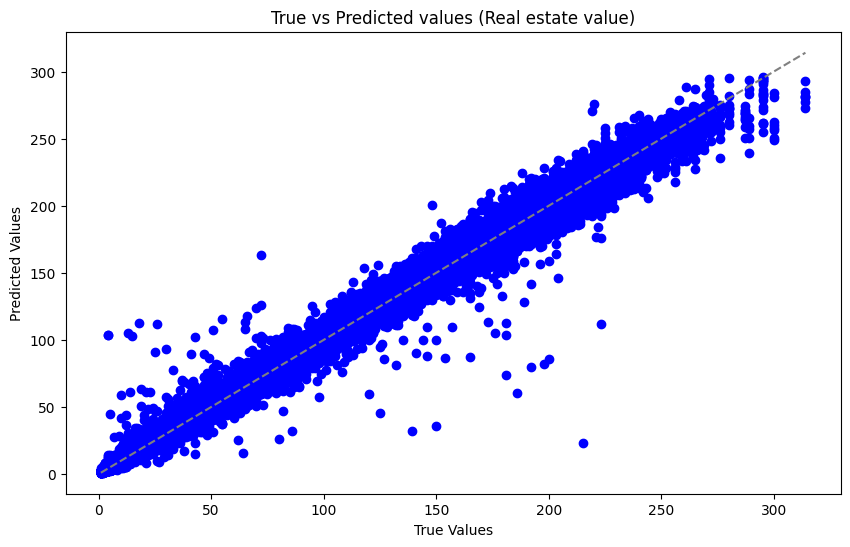

In [26]:
# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted values (Real estate value)')
plt.show()

## <font color='#11a642' size='5'> Построение модели бустинга **XGBoost**. Гиперпараметры подберите либо вручную, либо с помощью GridSearchCV или RandomizedSearchCV


- необходимо ли обрабатывать категориальные признаки заранее?
- необходимо ли обрабатывать пропуски?

In [27]:
# Построение XGBoost. Подберем гиперпараметры с помощью GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 9],
    'learning_rate': [0.01, 0.05, 0.1]
}

model_xgb = XGBRegressor(random_state=42, n_estimators=100, subsample=0.5, colsample_bytree=0.2)
grid_search_xgb = GridSearchCV(model_xgb, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.2,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 5, 9]},
             scoring='neg_mean_absolute_error')

In [28]:
# Выведем наилучшие параметры
best_params_xgb = grid_search_xgb.best_params_
best_params_xgb

{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5}

In [29]:
# Построение модели
best_xgb_regressor = grid_search_xgb.best_estimator_
best_xgb_regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
# Предсказания на тестовом и тренировочном наборе
y_pred_best_xgb_test = best_xgb_regressor.predict(X_test)
y_pred_best_xgb_train = best_xgb_regressor.predict(X_train)

In [31]:
# Вычисление метрик
mse_train = mean_squared_error(y_train, y_pred_best_xgb_train)
mse_test = mean_squared_error(y_test, y_pred_best_xgb_test)
mae_train = mean_absolute_error(y_train, y_pred_best_xgb_train)
mae_test = mean_absolute_error(y_test, y_pred_best_xgb_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_best_xgb_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_best_xgb_test)

# Вывод результатов
print(f'Mean Squared Error на трейне: {mse_train:.3f}')
print(f'Mean Squared Error на тесте: {mse_test:.3f}')
print(f'Mean Absolute Error на трейне: {mae_train:.3f}')
print(f'Mean Absolute Error на тесте: {mae_test:.3f}')
print(f'Mean Absolute Percantage Error на трейне: {mape_train:.3f}')
print(f'Mean Absolute Percantage Error на тесте: {mape_test:.3f}')

Mean Squared Error на трейне: 87.565
Mean Squared Error на тесте: 87.469
Mean Absolute Error на трейне: 6.627
Mean Absolute Error на тесте: 6.638
Mean Absolute Percantage Error на трейне: 0.161
Mean Absolute Percantage Error на тесте: 0.162


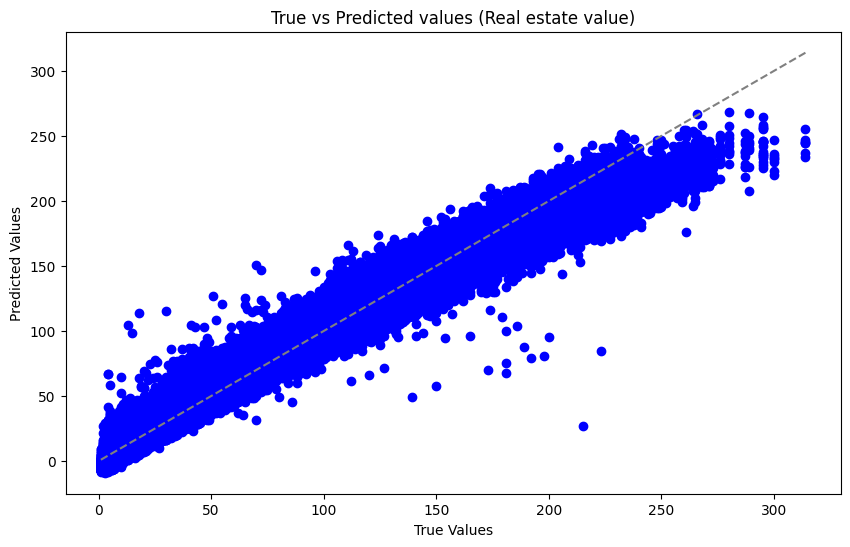

In [32]:
# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_xgb_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted values (Real estate value)')
plt.show()

## <font color='#11a642' size='5'> Построение модели бустинга **LightGBM**. Гиперпараметры подберите либо вручную, либо с помощью GridSearchCV или RandomizedSearchCV


- необходимо ли обрабатывать категориальные признаки заранее?
- необходимо ли обрабатывать пропуски?

In [33]:
# Построение LightGBV. Подберем гиперпараметры с помощью GridSearchCV

param_grid_lgbm = {
    'num_leaves': [50, 100, 150],
    'max_depth': [3, 5, 9],
    'learning_rate': [0.01, 0.05, 0.1]
}

model_lgbm = lgb.LGBMRegressor(random_state=42, objective='regression', metric='L1')
grid_search_lgbm = GridSearchCV(model_lgbm, param_grid_lgbm, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 562500, number of used features: 7
[LightGBM] [Info] Start training from score 88.282201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

GridSearchCV(cv=5,
             estimator=LGBMRegressor(metric='L1', objective='regression',
                                     random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 9], 'num_leaves': [50, 100, 150]},
             scoring='neg_mean_absolute_error')

In [34]:
# Выведем наилучшие параметры
best_params_lgb = grid_search_lgbm.best_params_
best_params_lgb

{'learning_rate': 0.1, 'max_depth': 9, 'num_leaves': 150}

In [35]:
# Построение модели
best_lgb_regressor = grid_search_lgbm.best_estimator_
best_lgb_regressor

LGBMRegressor(max_depth=9, metric='L1', num_leaves=150, objective='regression',
              random_state=42)

In [36]:
# Предсказания на тестовом и тренировочном наборе
y_pred_best_lgb_test = best_lgb_regressor.predict(X_test)
y_pred_best_lgb_train = best_lgb_regressor.predict(X_train)

In [37]:
# Вычисление метрик
mse_train = mean_squared_error(y_train, y_pred_best_lgb_train)
mse_test = mean_squared_error(y_test, y_pred_best_lgb_test)
mae_train = mean_absolute_error(y_train, y_pred_best_lgb_train)
mae_test = mean_absolute_error(y_test, y_pred_best_lgb_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_best_lgb_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_best_lgb_test)

# Вывод результатов
print(f'Mean Squared Error на трейне: {mse_train:.3f}')
print(f'Mean Squared Error на тесте: {mse_test:.3f}')
print(f'Mean Absolute Error на трейне: {mae_train:.3f}')
print(f'Mean Absolute Error на тесте: {mae_test:.3f}')
print(f'Mean Absolute Percantage Error на трейне: {mape_train:.3f}')
print(f'Mean Absolute Percantage Error на тесте: {mape_test:.3f}')

Mean Squared Error на трейне: 11.957
Mean Squared Error на тесте: 13.327
Mean Absolute Error на трейне: 2.154
Mean Absolute Error на тесте: 2.201
Mean Absolute Percantage Error на трейне: 0.038
Mean Absolute Percantage Error на тесте: 0.039


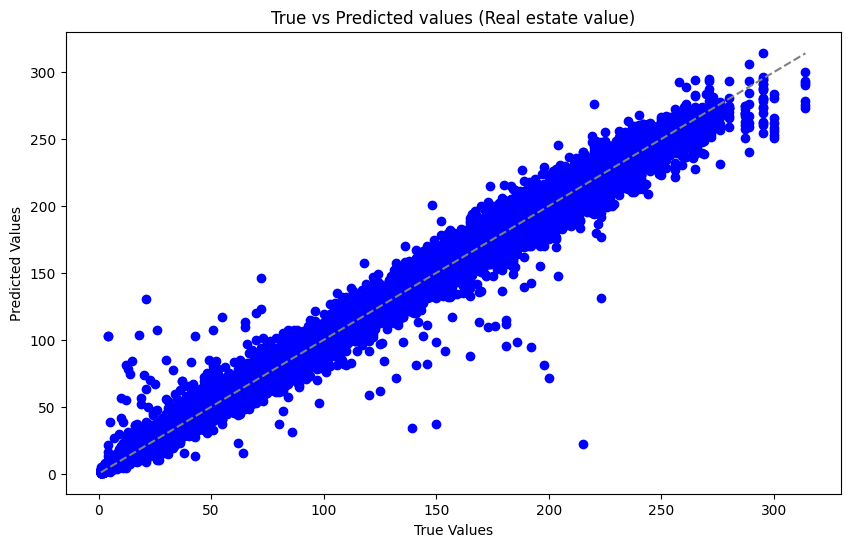

In [38]:
# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_lgb_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted values (Real estate value)')
plt.show()

## <font color='#11a642' size='5'> Построение модели бустинга **Catboost**. Гиперпараметры подберите либо вручную, либо с помощью GridSearchCV или RandomizedSearchCV


- необходимо ли обрабатывать категориальные признаки заранее?
- необходимо ли обрабатывать пропуски?

In [39]:
# Построение CatBoost. Подберем гиперпараметры с помощью GridSearchCV

param_grid_cb = {
    'iterations': [3, 6],
    'depth': [3, 5],
    'learning_rate': [0.01, 0.05],
    'l2_leaf_reg': [2, 7],
    'border_count': [2, 6]
}

model_cb = CatBoostRegressor(random_state=42, verbose=0)
grid_search_cb = GridSearchCV(model_cb, param_grid_cb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_cb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002467C887E00>,
             n_jobs=-1,
             param_grid={'border_count': [2, 6], 'depth': [3, 5],
                         'iterations': [3, 6], 'l2_leaf_reg': [2, 7],
                         'learning_rate': [0.01, 0.05]},
             scoring='neg_mean_absolute_error')

In [40]:
# Выведем наилучшие параметры
best_params_cb = grid_search_cb.best_params_
best_params_cb

{'border_count': 6,
 'depth': 5,
 'iterations': 6,
 'l2_leaf_reg': 2,
 'learning_rate': 0.05}

In [41]:
# Построение модели
best_cb_regressor = grid_search_cb.best_estimator_
best_cb_regressor

In [42]:
# Предсказания на тестовом и тренировочном наборе
y_pred_best_cb_test = best_cb_regressor.predict(X_test)
y_pred_best_cb_train = best_cb_regressor.predict(X_train)

In [43]:
# Вычисление метрик
mse_train = mean_squared_error(y_train, y_pred_best_cb_train)
mse_test = mean_squared_error(y_test, y_pred_best_cb_test)
mae_train = mean_absolute_error(y_train, y_pred_best_cb_train)
mae_test = mean_absolute_error(y_test, y_pred_best_cb_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_best_cb_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_best_cb_test)

# Вывод результатов
print(f'Mean Squared Error на трейне: {mse_train:.3f}')
print(f'Mean Squared Error на тесте: {mse_test:.3f}')
print(f'Mean Absolute Error на трейне: {mae_train:.3f}')
print(f'Mean Absolute Error на тесте: {mae_test:.3f}')
print(f'Mean Absolute Percantage Error на трейне: {mape_train:.3f}')
print(f'Mean Absolute Percantage Error на тесте: {mape_test:.3f}')

Mean Squared Error на трейне: 2237.294
Mean Squared Error на тесте: 2237.807
Mean Absolute Error на трейне: 39.719
Mean Absolute Error на тесте: 39.724
Mean Absolute Percantage Error на трейне: 1.613
Mean Absolute Percantage Error на тесте: 1.613


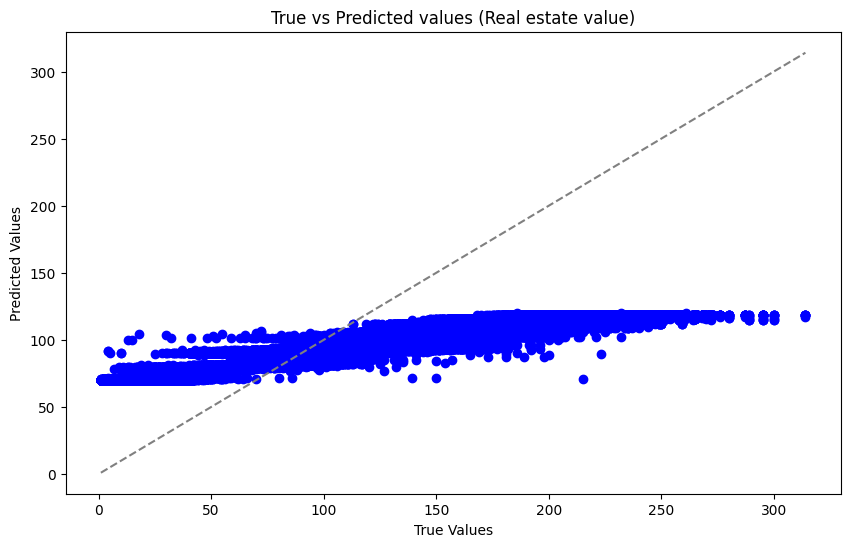

In [44]:
# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_cb_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted values (Real estate value)')
plt.show()

## <font color='#11a642' size='5'> Выводы:

### <font color='#11a642' size='4'>
- Какая модель оказалась более стабильной и лучше по метрикам?
- Какая модель требует меньше дополнительных обработок данных?
- Какую модель вы выбираете и почему?

Ответ

1. Наиболее стабильной и лучше по метрикам оказалась модель бустинга XGBoost

2. Модель бустинга CatBoost требует меньше дополнительных обработок данных, т.к. она способна обрабатывать категориальные признаки

3. Наиболее лучшая модель - модель бустинга XGBoost, т.к. она лучше по метрикам и по времени обучения занимает не очень много времени